## 强化学习与最优控制：用于轨迹跟踪的 LQR

来自知乎：https://zhuanlan.zhihu.com/p/437666628


轨迹优化：一辆汽车被赋予一项任务来控制自己，使其遵循定义的航线或轨迹。

如果 ᵢ 是时刻 i 的汽车控制 uᵢ= { throttle, Steering }ᵢ

汽车需要应用一系列控制操作 U: ₀, ₁, ₂ ... n 以到达所有的点，

本文的任务是找到一个可行的控制轨迹 U，使用动态系统 f 生成相应的状态轨迹 X，从而使成本函数 J(U) 最小化。

1.控制轨迹 (U)：控制变量 ᵢ 是时刻 i 的输入，序列是这些控制操作（油门、转向），控制操作帮助汽车达到所有目标。


2.状态轨迹（X）：状态 ᵢ是对当前场景的描述。 如：汽车的“状态”包括机器人的当前位置（ X、Y 坐标）和方向（yaw γ）。 这种状态受到控制输入变化的影响。

![](https://pic3.zhimg.com/80/v2-19d1f51dd3d0ee93399c23bb218c6f6a_1440w.jpg)




3.动态系统（f）：一个数学模型，主要介绍汽车的世界是如何运作的。 当从状态 xᵢ 采取动作 uᵢ 时，模型 f 预测下一个状态 xᵢ+₁。
在动力汽车示例中，可以使用运动学方程从数学上确定系统动力学 f

4.成本函数（J）：最优控制是关于成本函数的。 它在数学上描述序列问题陈述的目标。 最优控制方法通过优化成本函数 J(U) 来计算最优轨迹 U。



![](https://pic1.zhimg.com/80/v2-7219ee6140d34227c275e4172d46f648_1440w.jpg)

在开始定义的轨迹问题中，目标是到达定义的点。 将成本函数定义为汽车位置和下一个点之间的余弦距离，当最小化余弦距离成本时，更接近下一个点。

### LQR


最优控制问题的一个特例，即动态方程 f 是线性的，目标函数是 x 和 u 的二次函数。 这个子问题在最优控制中非常重要，因为存在使用微分 Ricatti 方程的 LQR 问题的解析解。 定义系统动力学函数 (f) ，LQR 的成本函数 J(U)，通过在 python 中编写 LQR 来解决汽车轨迹优化问题。

![](https://pic4.zhimg.com/80/v2-6b86e8d45831d7d7308bb285d8c34503_1440w.jpg)


所以动力学方程是线性的，使用矩阵 A 和 B 来描述线性。 成本函数 J(U) ：它是 x 和 u 的二次函数，

![](https://pic4.zhimg.com/80/v2-67c4751f30a5e025574a3a4cb98eaf77_1440w.jpg)




Q(t) 称为状态成本矩阵。 Q 权衡每个状态在状态向量中的相对重要性。 Q 也可为惩罚机制。 Q 能够通过使 Q 的相应值变大来定位想要低误差的状态。 R(t) 是输入成本矩阵。 该矩阵控制惩罚。




### 代数 Riccati 方程

简要讨论 LQR 问题的解析解。 这是有效解的一种简化：控制律可以表示为线性状态反馈

![](https://pic1.zhimg.com/80/v2-756e5cf81e653c7075f4fbb29d02b0fc_1440w.png)


R 是输入成本矩阵，B 是输入矩阵。 现在 S(t) 是微分 Ricatti 方程的解：

![](https://pic1.zhimg.com/80/v2-5908b31a268c4f8a3d2836eab44eb9f0_1440w.png)


可以使用反向规约backward induction找到解，直接跳转到最终解：

![https://pic2.zhimg.com/80/v2-e6ed411dffa5c2ff4ca6bf2e782c4011_1440w.jpg](https://img-blog.csdnimg.cn/e64a8f9d500042ab94b5410daa6b4239.png)



### 轨迹跟踪问题：LQR

现在使用 LQR 和 python 实现汽车轨迹跟踪问题。 为了在最优控制范式中定义问题，需要定义状态、控制操作、系统动力学和成本函数。 引入问题本身的同时定义状态向量。

![](https://pic3.zhimg.com/80/v2-19d1f51dd3d0ee93399c23bb218c6f6a_1440w.jpg)



接下来定义线性的系统动力学方程。
![](https://pic1.zhimg.com/80/v2-c5e1f7fb8d6b8eea3df5d4255c2facd0_1440w.jpg)

控制操作 uᵢ 包括速度和转向输入。 现在使用无摩擦运动学方程的案例来近似汽车在世界上的运动。

![](https://pic3.zhimg.com/80/v2-89f6e8b66a0966fde95624795d73c3de_1440w.jpg)

接下来使用矩阵来查找 A 和 B 矩阵


![](https://pic2.zhimg.com/v2-fe2e7a535379f736974d4338466ab591_r.jpg)

Q 矩阵为正定矩阵，惩罚希望汽车所处的位置与当前位置之间的差异。 通过使 Q 的相应值变大来定位我们想要低误差的状态。 

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
import numpy as np 
import time
np.set_printoptions(precision=3,suppress=True)
max_linear_velocity = 3.0
max_angular_velocity = 1.5708

![](https://pic2.zhimg.com/v2-fe2e7a535379f736974d4338466ab591_r.jpg)

In [3]:
def getB(yaw, deltat):
    """_summary_
    矩阵B
    Args:
        yaw (_type_): _description_
        deltat (_type_): _description_

    Returns:
        _type_: _description_
    """
    B = np.array([
            [np.cos(yaw)*deltat, 0],
            [np.sin(yaw)*deltat, 0], 
            [0, deltat]
            ])
    return B


def state_space_model(A, state_t_minus_1, B, control_input_t_minus_1):
    """_summary_
    状态方程
    Args:
        A (_type_): _description_
        state_t_minus_1 (_type_): _description_
        B (_type_): _description_
        control_input_t_minus_1 (_type_): _description_

    Returns:
        _type_: _description_
    """
    state_estimate_t = (A @ state_t_minus_1) + (B @ control_input_t_minus_1)
    return state_estimate_t


In [7]:
for i in range(5, 0, -1):
    print(i)

5
4
3
2
1


![https://pic2.zhimg.com/80/v2-e6ed411dffa5c2ff4ca6bf2e782c4011_1440w.jpg](https://img-blog.csdnimg.cn/e64a8f9d500042ab94b5410daa6b4239.png)

In [ ]:
def lqr(actual_state_x, desired_state_xf, Q, R, A, B, dt):
    x_error = actual_state_x - desired_state_xf
    N = 100
    P = [None] * (N + 1)
    Qf = Q
    P[N] = Qf
    """从最后一步开始"""
    for i in range(N, 0, -1):
        """计算P矩阵"""
        P[i-1] = Q + A.T @ P[i] @ A - (A.T @ P[i] @ B) @ np.linalg.pinv(
            R + B.T @ P[i] @ B) @ (B.T @ P[i] @ A)
    K = [None] * N
    u = [None] * N
    for i in range(N):
        """计算K和U"""
        K[i] = -np.linalg.pinv(R + B.T @ P[i+1] @ B) @ B.T @ P[i+1] @ A
        u[i] = K[i] @ x_error
    u_star = u[N-1]
    return u_star


In [8]:
def get_control_waypoints(waypoints, R, dt=0.5, error_th=1, verbose=False):
    waypoints = [np.array(i) for i in waypoints]
    trajectory = []
    controls = []
    error = []
    waypoints_reached = []
    actual_state_x = np.array([0, 0, 0])  # 初始状态
    A = np.array([[1.0,  0,   0], [0, 1.0,   0], [0,  0, 1.0]])  # 矩阵A
    Q = np.array([[1, 0, 0], [0, 1.0, 0], [0, 0, 1.0]])  # 矩阵Q
    for desired_state_xf in waypoints:
        state_error_magnitude = 1e10
        waypoints_reached.append(actual_state_x)
        while state_error_magnitude >= error_th:
            if verbose:
                print(f'Current State = {actual_state_x}')
                print(f'Desired State = {desired_state_xf}')
            state_error = actual_state_x - desired_state_xf
            trajectory.append(actual_state_x)
            state_error_magnitude = np.linalg.norm(state_error)
            error.append(state_error_magnitude)
            if verbose:
                print(f'State Error Magnitude = {state_error_magnitude}')
            
            B = getB(actual_state_x[2], dt)
            
            optimal_control_input = lqr(actual_state_x,desired_state_xf, Q, R, A, B, dt)

            
            controls.append(optimal_control_input)
            if verbose:
                print(f'Control Input = {optimal_control_input}')
            actual_state_x = state_space_model(A, actual_state_x, B, optimal_control_input)
            if verbose:
                if state_error_magnitude < error_th:
                    print("\nGoal Has Been Reached Successfully!")
    return(trajectory, controls, waypoints_reached, error)

### 画图

In [10]:
def get_animation(waypoints,trajectory,verbose=False,marker_txt=True):
    plt.style.use('dark_background')
    fig = plt.figure(figsize=(10, 10)) 
    ax = plt.axes(xlim=(0, 110), ylim=(0, 110)) 
    y = np.array(waypoints).T[1]
    z = np.array(waypoints).T[0]
    n = [i for i in range(len(waypoints))]
    if marker_txt:
        ax.scatter(z, y,color="Red")
        for i, txt in enumerate(n):
            ax.annotate(txt, (z[i], y[i]),color="Red")
    else:
        n = [i for i in range(len(waypoints)) if i%20==0]
        for i, txt in enumerate(n):
            ax.plot(z, y, "-r", label="course")
            ax.annotate(txt, (z[txt], y[txt]),color="Red") 
        plt.subplots()
        plt.plot(np.array(waypoints).T[0], np.array(waypoints).T[1], "-r", label="spline")
        plt.plot(np.array(trajectory).T[0], np.array(trajectory).T[1], "-g", label="tracking")
        plt.axis("equal")
        plt.xlabel("x[m]")
        plt.ylabel("y[m]")
        plt.legend()
    line, = ax.plot([], [],lw=2,   marker='>',markersize=6, ) 
    label = ax.text(40, 100, 'control', fontsize=12, color="Red")
    
    def init(): 
        line.set_data([], []) 
        return line, 
    xdata, ydata = [], [] 
    
    def animate(i): 
        x = trajectory[i][0]
        y = trajectory[i][1]
        xdata.append(x) 
        ydata.append(y) 
        line.set_data(xdata, ydata)
        text_ = "       CONTROL\n"+'Velocity: '+ str(np.round(controls[i][0],2))+'\nAngular-velocity: '+str(np.round(controls[i][1],2))
        label.set_text(text_)
        if verbose:
            print(i,x,y)
        return line, 
    anim = animation.FuncAnimation(fig, animate, init_func=init, 
                                  frames=len(trajectory), interval=1, blit=True,) 
    anim.save('coil.gif',writer='imagemagick')
    plt.subplots()
    plt.plot(np.arange(len(controls)), np.array(controls).T[0], "-r", label="Velocity")
    plt.xlabel("Time [s]")
    plt.ylabel("Velocity")
    plt.show()
    plt.subplots()
    plt.plot(np.arange(len(controls)), np.array(controls).T[1], "-r", label="Angular Velocity")
    plt.xlabel("Time [s]")
    plt.ylabel("angular Velocity")
    plt.show()
    

MovieWriter imagemagick unavailable; using Pillow instead.


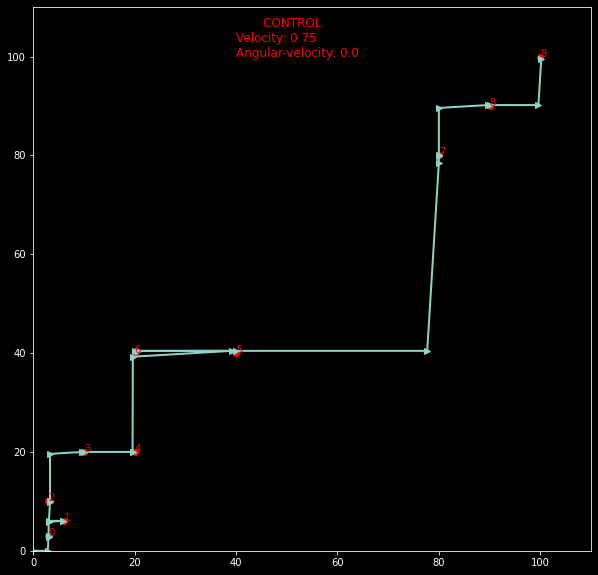

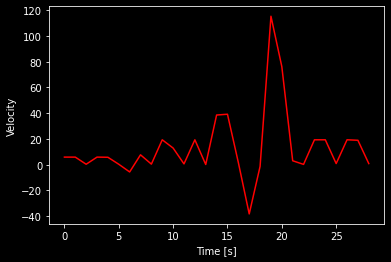

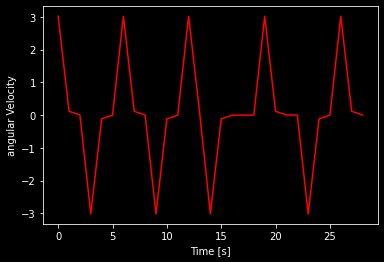

In [11]:
waypoints = [   
        [3,3,np.pi/2],
        [6,6,0],
        [3,10,np.pi/2],
        [10,20,0],
        [20,20,np.pi/2],
        [40,40,0],
        [20,40,0],
        [80,80,np.pi/2],
        [90,90,0],
        [100,100,np.pi/2]
        ]
R = np.array([[0.01,   0],[  0, 0.01]])
trajectory,controls,waypoints_reached,error = get_control_waypoints(waypoints,R, dt = 0.5,error_th = 1, verbose=False)
get_animation(waypoints,trajectory)

MovieWriter imagemagick unavailable; using Pillow instead.


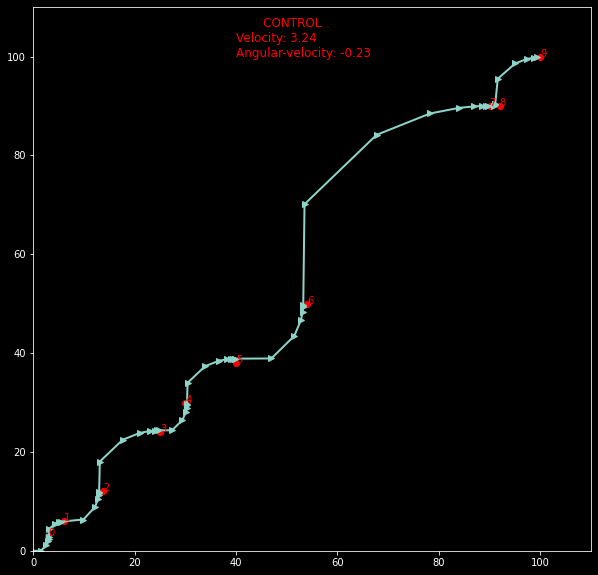

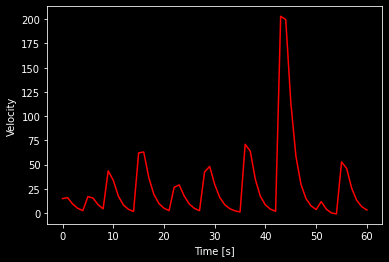

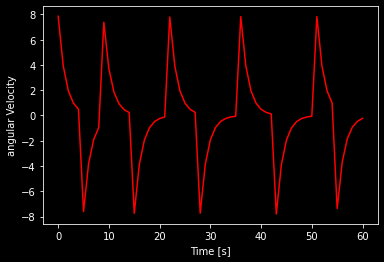

In [13]:


waypoints = [
        [3, 3, np.pi/2],
        [6, 6, 0],
        [13.75, 12, np.pi/2],
        [25, 24, 0],
        [30, 30, np.pi/2],
        [40, 38, 0],
        [54, 50, np.pi/2],
        [90, 90, 0],
        [92, 90, np.pi/2],
        [100, 100, 0]
        ]
R = np.array([[0.01,   0], [0, 0.01]])
trajectory, controls, waypoints_reached, error = get_control_waypoints(
    waypoints, R, dt=0.1, error_th=1, verbose=False)

get_animation(waypoints, trajectory)


Current State = [0 0 0]
Desired State = [0.    0.    0.796]
State Error Magnitude = 0.7958959768960832
Control Input = [0.    3.979]

Goal Has Been Reached Successfully!
Current State = [0.    0.    0.398]
Desired State = [0.702 0.716 0.794]
State Error Magnitude = 1.078638226756838
Control Input = [4.625 1.981]

Goal Has Been Reached Successfully!
Current State = [0.426 0.179 0.596]
Desired State = [1.406 1.43  0.789]
State Error Magnitude = 1.6002064205736153
Control Input = [7.564 0.964]

Goal Has Been Reached Successfully!
Current State = [1.052 0.604 0.692]
Desired State = [2.114 2.136 0.78 ]
State Error Magnitude = 1.8659485804721965
Control Input = [8.976 0.438]

Goal Has Been Reached Successfully!
Current State = [1.743 1.177 0.736]
Desired State = [2.826 2.833 0.768]
State Error Magnitude = 1.97883163041754
Control Input = [9.572 0.157]

Goal Has Been Reached Successfully!
Current State = [2.452 1.82  0.752]
Desired State = [3.545 3.518 0.758]
State Error Magnitude = 2.0190117

MovieWriter imagemagick unavailable; using Pillow instead.


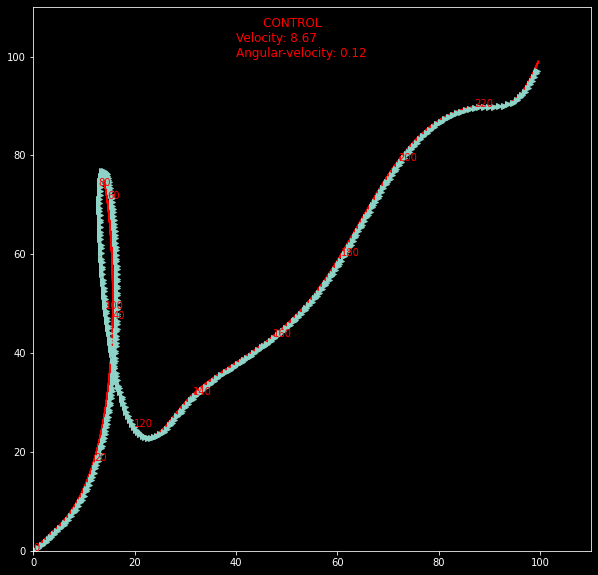

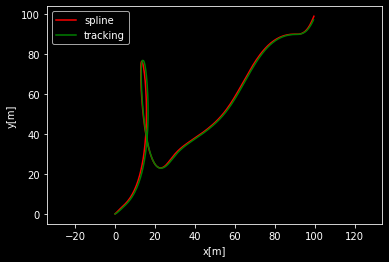

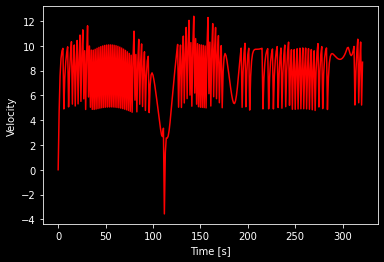

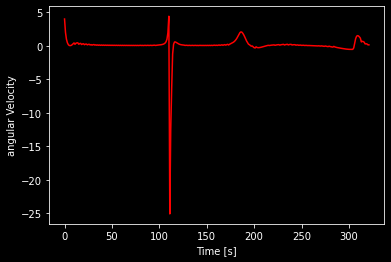

In [15]:
import cubic_spline_planner
ax = [0,3,6,13,25,30,40,54,90,92,100]
ay = [0,3,6,75,24,30,38,50,90,90,100]
cx, cy, cyaw, ck, s = cubic_spline_planner.calc_spline_course(ax, ay, ds=1)
waypoints = []
for i in range(len(cx)):
    waypoints.append([cx[i],cy[i],cyaw[i] ])
    
R = np.array([[0.01,   0],[  0, 0.01]])
trajectory,controls,waypoints_reached,error = get_control_waypoints(waypoints,R,dt=0.1,error_th = 2, verbose=True)
get_animation(waypoints,trajectory, marker_txt =False)